![](https://www.math.unipd.it/~marcuzzi/BannerStrumentifondamentali.png)

# Le matrici sparse

Le matrici sparse sono una classe speciale di matrici con la caratteristica di contenere un significativo numero di elementi nulli, intuitivamente diciamo che gli zeri sono così tanti che se ne guadagna non tenendone conto. Le matrici sparse si contrappongono alle matrici dense, nelle quasi praticamente tutti gli elementi sono diversi da zero.

Vediamo come cresce la memoria richiesta in funzione della dimensione $n$ di una matrice $n \times n$, supponendo che i dati siano in doppia precisione, cioè che ogni elemento occupi 8 byte.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import matplotlib.pyplot as plt

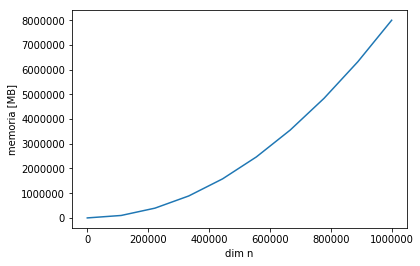

In [2]:
x = np.linspace(0, 1e6, 10)
plt.plot(x, 8.0 * (x**2) / 1e6)
plt.xlabel("dim n")
plt.ylabel("memoria [MB]")
plt.show()

# Formati
Python consente manipolare matrici sparse, memorizzandole in forma compatta, ossia memorizzando solo gli elementi non nulli insieme ai loro indici. Ciò permette di ridurre considerevolmente la memoria utilizzata e di ridurre il tempo di calcolo eliminando operazioni su elementi nulli.

Esistono diversi metodi di *compressione* per le matrici sparse, vediamo i più comuni. Definiamo una matrice $mat$ di dimensione $n\_rows \times n\_col$ con un numero totale di elementi non zero $nnz$. Affinché una matrice si possa dire sparse, $nnz$ deve essere molto piccolo rispetto al numero totale di entrale, che è uguale a $n\_rows * n\_col$. Vediamo le varie scritture in formato compresso per questa matrice.

In [3]:
n_row = 4
n_col = 4
nnz   = 4
mat = np.array([[4, 0, 9, 0],
                [0, 7, 0, 0],
                [0, 0, 0, 0],
                [0, 0, 0, 5]])
print("Formato denso ")
print(mat)

Formato denso 
[[4 0 9 0]
 [0 7 0 0]
 [0 0 0 0]
 [0 0 0 5]]


### Il formato COO (COOrdinate format)
- una matrice è composta da tre array (row, col, data) di lunghezza nnz
- `data[i]` è il valore dell'elemento della matrice in posizione `(row[i], col[i])`
- non da accesso diretto alle sottomatrici o agli elementi
- è un formato veloce per costruire matrici sparse
- facilita le le conversioni tra i vari formati
- adatto alla costruzione di matrici elementi finiti

In [4]:
mat_coo = sparse.coo_matrix(mat)
print("Formato sparso ")
print(mat_coo)

Formato sparso 
  (0, 0)	4
  (0, 2)	9
  (1, 1)	7
  (3, 3)	5


In [5]:
print("indici di colonna")
print(mat_coo.col)
print("indici di riga")
print(mat_coo.row)
print("valori")
print(mat_coo.data)

indici di colonna
[0 2 1 3]
indici di riga
[0 0 1 3]
valori
[4 9 7 5]


In [6]:
#alternativa
row = np.array([0, 3, 1, 0])
col = np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])
mat_coo = sparse.coo_matrix((data, (row, col)), shape=(4, 4))
print(mat_coo)

  (0, 0)	4
  (3, 3)	5
  (1, 1)	7
  (0, 2)	9


In [7]:
#slicing
print(mat_coo[0,0])

TypeError: 'coo_matrix' object is not subscriptable

### Il formato LIL (LInked Lists format)
- una matrice è composta da due liste (rows, data) di lunghezza $n\_rows$
- ogni matrice viene salvata per righe
- rows[i] è una lista che contiene gli indici colonna degli elementi non nulli della riga i-esima
- data[i] è una lista che contiene i valori degli elementi non nulli della riga i-esima
- è il formato più adatto ad essere modificato (elementi diversi da zero vensono aggiunti e/o eliminati)
- si usa principalmente quando il pattern della matrice non è noto a priori o deve essere modificato
- accesso diretto ottimizzato per righe e singoli elementi, accesso lento per colonne 

In [8]:
mat_lil = sparse.lil_matrix(mat)
print("Formato sparso")
print(mat_lil)

Formato sparso
  (0, 0)	4
  (0, 2)	9
  (1, 1)	7
  (3, 3)	5


In [9]:
print("indici di colonna")
print(mat_lil.rows)
print("valori")
print(mat_lil.data)

indici di colonna
[list([0, 2]) list([1]) list([]) list([3])]
valori
[list([4, 9]) list([7]) list([]) list([5])]


In [10]:
#aggiungo l'elemento -3 in posizione (2,2) 
mat_lil.rows[2].append(2)
mat_lil.data[2].append(-3)
print(mat_lil)

  (0, 0)	4
  (0, 2)	9
  (1, 1)	7
  (2, 2)	-3
  (3, 3)	5


In [11]:
#slicing
print("Elemento [0,0] = ", mat_lil[0,0])
print("Sottomatrice [1:][:] = ")
print( mat_lil[1:][:])

Elemento [0,0] =  4
Sottomatrice [1:][:] = 
  (0, 1)	7
  (1, 2)	-3
  (2, 3)	5


### Il formato CSR (Compressed Sparse Row format)
- una matrice è composta da tre array (data, indices, indptr)
- indices è un array di lunghezza nnz che contiene gli indici colonna
- data è un array di lunghezza nnz contiene i valori degli elementi non nulli
- indptr è un array di lunghezza n_row+1 che punta all'inizio di ogni riga con un elemento extra per determinare la fine degli array indices e data
- la riga i-esima è composta dagli elementi non nulli data[indptr[i]:indptr[i+1]] che indici di colonna indices[indptr[i]:indptr[i+1]]
- le operazioni di algebra lineare sono ottimizzate con questo formato
- accesso diretto ottimizzato per righe e singoli elementi, accesso lento per colonne
- aggiungere elementi è difficile

In [12]:
print(mat)
mat_csr = sparse.csr_matrix(mat)
print("Formato sparso ")
print(mat_csr)

[[4 0 9 0]
 [0 7 0 0]
 [0 0 0 0]
 [0 0 0 5]]
Formato sparso 
  (0, 0)	4
  (0, 2)	9
  (1, 1)	7
  (3, 3)	5


In [13]:
print("valori")
print(mat_csr.data)
print("indici di colonna")
print(mat_csr.indices)
print("puntatori alle righe")
print(mat_csr.indptr)

valori
[4 9 7 5]
indici di colonna
[0 2 1 3]
puntatori alle righe
[0 2 3 3 4]


In [14]:
print("inizio della riga 1 = ", mat_csr.indptr[1])
print("numero di elementi non nulli nella riga 1 = ", mat_csr.indptr[2] - mat_csr.indptr[1])
print("indici di colonna della riga 1 = ", mat_csr.indices[mat_csr.indptr[1]:mat_csr.indptr[2]])
print("numero di elementi non nulli nella matrice mat = ", mat_csr.indptr[n_row])

inizio della riga 1 =  2
numero di elementi non nulli nella riga 1 =  1
indici di colonna della riga 1 =  [1]
numero di elementi non nulli nella matrice mat =  4


In [15]:
#slicing
print("Elemento [0,0] = ", mat_csr[0,0])
print("Sottomatrice [1:][:] = ")
print( mat_csr[1:][:].todense())

Elemento [0,0] =  4
Sottomatrice [1:][:] = 
[[0 7 0 0]
 [0 0 0 0]
 [0 0 0 5]]


### Il formato CSC (Compressed Sparse Column format)
- è il duale del formato csr, la matrice viene però salvata per colonne
- una matrice è composta da tre array (data, indices, indptr)
- indices è un array di lunghezza nnz che contiene gli indici riga
- data è un array di lunghezza nnz contiene i valori degli elementi non nulli
- indptr è un array di lunghezza n_col+1 che punta all'inizio di ogni colonna con un elemento extra per determinare la fine degli array indices e data
- la colonna i-esima è composta dagli elementi non nulli data[indptr[i]:indptr[i+1]] che indici di colonna indices[indptr[i]:indptr[i+1]]
- le operazioni di algebra lineare sono ottimizzate con questo formato
- accesso diretto ottimizzato per colonne e singoli elementi, accesso lento per righe
- aggiungere elementi è difficile

In [16]:
mat_csr = sparse.csr_matrix(mat)
print("Formato sparso ")
print(mat_csr)

Formato sparso 
  (0, 0)	4
  (0, 2)	9
  (1, 1)	7
  (3, 3)	5


In [17]:
print("valori")
print(mat_csr.data)
print("indici di riga")
print(mat_csr.indices)
print("puntatori alle colonna")
print(mat_csr.indptr)

valori
[4 9 7 5]
indici di riga
[0 2 1 3]
puntatori alle colonna
[0 2 3 3 4]


In [18]:
print("inizio della colonna 1 = ", mat_csr.indptr[1])
print("numero di elementi non nulli nella colonna 1 = ", mat_csr.indptr[2] - mat_csr.indptr[1])
print("indici di riga della colonna 1 = ", mat_csr.indices[mat_csr.indptr[1]:mat_csr.indptr[2]])
print("numero di elementi non nulli nella matrice mat = ", mat_csr.indptr[n_col] - mat_csr.indptr[0])

inizio della colonna 1 =  2
numero di elementi non nulli nella colonna 1 =  1
indici di riga della colonna 1 =  [1]
numero di elementi non nulli nella matrice mat =  4


# Visualizzazione grafica

In [25]:
from scipy.io import mmread
cartella = './matrici_test/'

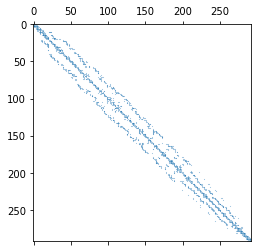

In [26]:
A = mmread(cartella+'ash292.mtx') #minimi quadrati
plt.spy(A, markersize = 0.1)

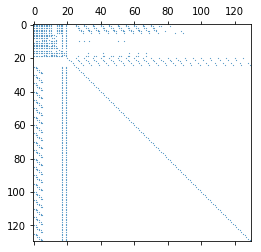

In [27]:
A = mmread(cartella+'arc130.mtx') #Jacobiana sistema nonlineare ODE
plt.spy(A, markersize = 0.2)

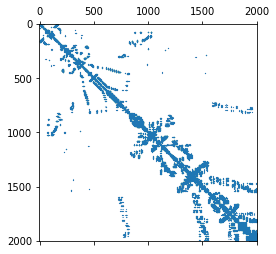

In [28]:
A = mmread(cartella+'bcsstk13.mtx') #problema agli autovalori
plt.spy(A, markersize = 0.1)

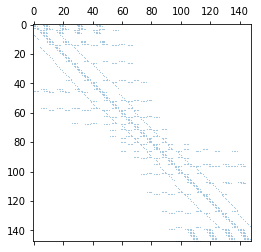

In [29]:
A = mmread(cartella+'cz148.mtx') #metodo Closest Point 
plt.spy(A, markersize = 0.1)

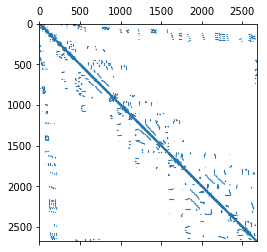

In [30]:
A = mmread(cartella+'dwt_2680.mtx') #elementi finiti
plt.spy(A, markersize = 0.1)

Le matrici che descrivono problemi reali sono spesso stutturate.

# Applicazioni
- problemi con i grafi
- metodo elementi finiti e differenze finite
- soluzione di sistemi nonlineari
- problemi boundary value
- minimi quadrati